In [30]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import log, exp, sqrt, pow
from matplotlib import rc
from matplotlib.colors import LogNorm
from scipy import interpolate

plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')

# constants
pi = 3.14159265359
alpha = 1/137.035999084  # fine structure constant 
me = 510998.950  # e- mass [eV]
Mpl = 2e27  # planck mass [eV]
zeta3 = 1.202056903159594  # Riemann zeta(3)
amu = 931.494e6  # amu in eV  

# conversion factors
s2eV = 6.582119569e-16  # Hz to eV
J2eV = 1.0/1.602176634e-19  # Joules to eV (1 / e)
m2eV = 1.973269804e-7  # m-1 to eV
K2eV = 8.617333262e-5  # Kelvin to eV
kg2eV = 5.609588604e35  
T2eV = 2e2 # Tesla to eV2 conversion [eV2/T]
G2eV = 2e-2 # Gauss to eV2 conversion [eV2/G]

In [31]:
# file = "/home/yuangw/Documents/GitHub/Chameleons/2406.01691/data/"
file = "/Users/yuangw/Documents/GitHub/chameleons/2406.01691/data/"
r = np.loadtxt(file + "r.dat")  # radial distance [eV-1]
T = np.loadtxt(file + "T.dat")  # solar temperature [eV]
rho = np.loadtxt(file + "rho.dat")  # solar density [eV4]
ne = np.loadtxt(file + "ne.dat")  # electron number density [eV3]
nbar = np.loadtxt(file + "nbar.dat")  # Z2-summed number density [eV3]
nbar2 = np.loadtxt(file + "nbar2.dat")  # Z2-summed number density minus electrons [eV3]
wp = np.loadtxt(file + "wp.dat")  # plasma frequency [eV]
nH = np.loadtxt(file + "nH.dat")  # H number density [eV3]
nHe3 = np.loadtxt(file + "nHe3.dat")  # He3 number density [eV3]
nHe4 = np.loadtxt(file + "nHe4.dat")  # He4 number density [eV3]
z1 = np.loadtxt(file + "Z1.dat")  # gaunt factors for Z=1
z2 = np.loadtxt(file + "Z2.dat")  # gaunt factors for Z=2
z1_T = np.loadtxt(file + "z1_saved.dat")  # gaunt factors for Z=1
z2_T = np.loadtxt(file + "z2_saved.dat")  # gaunt factors for Z=2
print(np.shape(z1), np.shape(z1_T))
print(z1[310][164], z1_T[310][164])

n=1
E = 2.4e-3   #eV
Bm = 100
rSolar = 6.957e8 / m2eV  # solar radius [eV-1]
radius = rSolar * np.logspace(-2, 0, 200)  # [eV-1]

# solar magnetic field parameters
B0 = 3000 * T2eV  # radiative zone max B [eV2]  200*T2eV;
B1 = 50 * T2eV  # tachocline max B [eV2]  4*T2eV;//
B2 = 4 * T2eV  # or 4, outer region max B [eV2]  3*T2eV;//
Bf = [B0, B1, B2]  # [eV2]

Rrad = 0.712 *rSolar  # [eV-1]  
Rtach = 0.732 *rSolar  # [eV-1]  
Rupper = 0.96 *rSolar  # [eV-1]   
dtach = 0.02 *rSolar  # [eV-1]   
dupper = 0.035 *rSolar  # [eV-1]  
arr = np.arange(1, 1968)

(501, 201) (501, 201)
1.1210984991 1.121098499


### Chameleon production in Bulk Magnetic Fields

We integrate over the phase space to obtain the total production rate $\dot{N}$:
$$ \mathrm{d} \dot N = \mathrm{d}V \frac{\mathrm{d}^3k_\phi}{(2\pi)^3} \Gamma_\phi^{\operatorname{prod}} = \mathrm{d}V \frac{\mathrm{d}^3k_\phi}{(2\pi)^3}  (\frac{\beta_\gamma B_\perp}{M_\mathrm{Pl}})^2 \frac{k_\phi^2}{\vert\omega^2 - k_\gamma^2 - \pi_\gamma \vert^2} \frac{\Gamma_\gamma}{e^{\omega/T} -1}  $$
Hence 
$$  \frac{1}{\beta_\gamma^2}\frac{\mathrm{d}\dot N}{\mathrm{d}\omega} \!=\! \frac{2}{\pi M_\mathrm{Pl}^2} \!\int_0^{R_\odot} \!\!\mathrm{d}r \frac{r^2 B_\perp^2(r)}{e^{\omega/T(r)} - 1} \frac{\omega(\omega^2 - m^2)^{3/2}}{(m_\gamma^2 - m^2)^2 \!+\! (\omega \Gamma_\gamma)^2} \Gamma_\gamma  $$
we have assumed the following form:
$$\Gamma_\gamma = \Gamma^{\rm abs}-\Gamma^{\rm pro} = \frac{64\pi^2\alpha^3}{3m_e^2\omega^3} \sqrt{\frac{m_e}{2\pi T}} n_e \left( 1\!-\!e^{-\omega/T} \right)\sum_i Z^2 n_i F_i + \frac{8\pi\alpha^2}{3m_e^2} n_e   $$
where the sum is over all ion species in the Sun, and $F_i$ is the thermally-averaged Gaunt factor for species $i$.

/var/folders/jg/fgqgnyxs1tlcbr5x6bxs_gl40000gn/T/ipykernel_17328/1215134836.py:104: RuntimeWarning: overflow encountered in exp
  factor2 = (np.power( (mg2 - ms2), 2.0) + (w*w*G*G) ) * (np.exp(w/T[c]) - 1.0)
/var/folders/jg/fgqgnyxs1tlcbr5x6bxs_gl40000gn/T/ipykernel_17328/1215134836.py:104: RuntimeWarning: overflow encountered in scalar multiply
  factor2 = (np.power( (mg2 - ms2), 2.0) + (w*w*G*G) ) * (np.exp(w/T[c]) - 1.0)


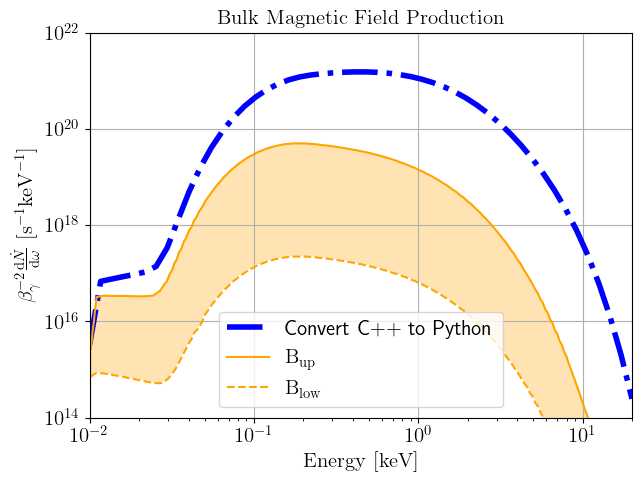

In [32]:
#chameleon model params n, Bm (matter coupling), assume rho dominated by matter density
def mCham2(c, Bm):  # effective mass square, Eq.18 in 2406.01691
    """Chameleon mass squared as a function of solar radius."""
    E4n = E**(4 + n)
    x = Bm * rho[c] / (n * Mpl * E4n)
    return n * (n + 1) * E4n * np.power(Bm * rho[c] / (n * Mpl * E4n), (n + 2) / (n + 1))


def Bsolar(c):
    if r[c] <= Rrad:  # radiative zone
        lam = 8.12
        x = r[c] / Rrad
        return B0 * (1 + lam) * np.power(1 + 1 / lam, lam) * x**2 * np.power(1 - x**2, lam)
    
    elif Rtach - dtach < r[c] < Rtach + dtach: # tachocline
        return B1 * (1 - ((r[c] - Rtach) / dtach)**2.0)

    elif Rupper - dupper < r[c] < Rupper + dupper: # outer region
        return B2 * (1 - ((r[c] - Rupper) / dupper)**2.0)

    else:
        return 0.0

Bsolar_vec = np.vectorize(Bsolar)

def GammaPhoton(c, w, g1, g2):  # absorption-production, paper 2406.01691 Eq.A20

    p1 = 64 * pi**2 * np.power(alpha, 3)
    p2 = 3 * np.power(me, 2) * np.power(w, 3)
    p3 = me * np.power(ne[c], 2) / (2 * pi * T[c])
    p4 = 1 - np.exp(-w / T[c])
    p5 = 8 * pi * np.power(alpha, 2) * ne[c] / (3 * np.power(me, 2))
    ions = (nH[c] * g1) + g2 * (4*nHe4[c] + 4*nHe3[c])  # sum of ion densities
    return p1 * np.power(p2, -1.0) * np.power(p3, 0.5) * p4 * ions + p5


####Find the nearest two temperatures T1, T2 in the table that bracket the actual physical temperature T_r(r) at that radius.
####But the table gives Θ = T / mₑ, so to compare with a physical T, you must divide by me when searching
# def selectG(c, w):
#     """Selects Gaunt factor from matrix and computes Gamma (eV)."""
#     indexT1 = indexT2 = indexX1 = indexX2 = 0

#     # convert Gaunt factor Theta to T in eV, Find indices for temperature interpolation
#     xx1 = np.append(0, z1[0])
#     xx2 = np.append(0, z2[0])
#     for i in range(1, 200):  #501*201
#         if xx1[i] < T[c] < xx1[i + 1]:
#             indexT1 = i
#         if xx2[i] < T[c] < xx2[i + 1]:
#             indexT2 = i

#     # Find indices for frequency interpolation
#     for i in range(1, 500):
#         if (z1[i][0] * T[c]) < w < (z1[i + 1][0] * T[c]):
#             indexX1 = i
#         if (z2[i][0] * T[c]) < w < (z2[i + 1][0] * T[c]):
#             indexX2 = i

#     g1 = z1[indexX1][indexT1] 
#     g2 = z2[indexX2][indexT2]
#     # print("Tr =", T[c], "IndexX1 =", indexX1, "IndexT1 =", indexT1, "g1 =", g1, "g2 =", g2)
#     return GammaPhoton(c, w, g1, g2)

def selectG(c, w):
    T_ev = T[c]
    T_over_me = T_ev / me

    def find_index(x, val):
        for i in range(1, len(x) - 1):
            if x[i] < val < x[i + 1]:
                return i
        raise ValueError(f"Value {val} out of bounds for interpolation.")

    a1 = find_index(z1[0], T_over_me)
    a2 = find_index(z2[0], T_over_me)

    freqs1 = z1[1:, 0] * T_ev
    freqs2 = z2[1:, 0] * T_ev

    b1 = find_index(freqs1, w) + 1  # +1 because we skipped row 0
    b2 = find_index(freqs2, w) + 1
    g1 = z1[b1][a1]
    g2 = z2[b2][a2]
    # g1 = z1[a1][a1]
    # g2 = z2[a2][a2]

    gp = GammaPhoton(c, w, g1, g2)
    return gp

def B_integrand(c, w, Bm):  # [eV Bg-2] Eq.7 in paper 2406.01691
    """Differential scalar production rate due to magnetic field."""
    if T[c] == 0:
        return 0
    
    mg2 = 4 * pi * alpha * ne[c]/me
    ms2 = mCham2(c, Bm)
    if w**2 <= mg2 or w**2 <= ms2:
        return 0.0
    
    B = Bsolar_vec(c)
    G = selectG(c, w)
    # factor1 = w* np.power(w*w - ms2, 1.0) * G
    factor1 = w* np.power(w*w - ms2, 1.5) * G
    factor2 = (np.power( (mg2 - ms2), 2.0) + (w*w*G*G) ) * (np.exp(w/T[c]) - 1.0)
    kernel = 2 * r[c]**2.0 * B**2.0/(pi*Mpl*Mpl)  * factor1/(factor2)
    return kernel  

B_integrand_vec = np.vectorize(B_integrand)

def B_solarIntg(w, Bm, tachocline=False):
    total = 0.0
    for c in range(len(r) - 2):
        if tachocline:
            if r[c]/rSolar > 0.712: #r[c]/rSolar < 0.712 or r[c]/rSolar > 0.752:
                continue
        total +=  0.5 * (B_integrand(c + 1, w, Bm) + B_integrand(c, w, Bm)) * (r[c + 1] - r[c])
    # print('B_integrand(c + 1, Bm, w)', B_integrand(c + 1, Bm, w), 'total = ', total)
    return total * 1e3/s2eV  # factor 1e3/s2eV convert [eV/eV] to [s-1 keV-1]

w_array = np.logspace(1, 4.3, 50)  # [eV]
Bspectrum = np.array([B_solarIntg(wi, Bm=100) for wi in w_array])


Bdata1 = np.loadtxt("/Users/yuangw/Documents/GitHub/chameleons/AGSS09/Blow.csv")
Bdata2 = np.loadtxt("/Users/yuangw/Documents/GitHub/chameleons/AGSS09/Bup.csv")
B1x, B1y = Bdata1[:, 0], Bdata1[:, 1]  # bulk magnetic field [eV-1]
Blow = interpolate.interp1d(B1x, B1y, fill_value="extrapolate", bounds_error=False)
B2x, B2y = Bdata2[:, 0], Bdata2[:, 1]  # bulk magnetic field [eV-1]
Bup = interpolate.interp1d(B2x, B2y, fill_value="extrapolate", bounds_error=False)

plt.figure(figsize=(7, 5))
plt.plot(w_array/1e3, Bspectrum, color='blue', linewidth=4, linestyle='-.', label='Convert C++ to Python')
plt.plot(B2x, B2y, color='orange', label=r'${\rm B_{up}}$', linestyle='-')
plt.plot(B1x, B1y, color='orange', label=r'${\rm B_{low}}$', linestyle='--')
plt.fill_between(B2x, B2x*0.1, Bup(B2x), color='orange', alpha=0.3)
plt.fill_between(B1x, B1x*0.1, Blow(B1x), color='white')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0.01, 20)
plt.ylim(1e14, 1e22)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'${\rm Energy~[keV]}$', fontsize=15)
plt.ylabel(r'$\beta_\gamma^{-2}\frac{\mathrm{d}\dot N}{\mathrm{d}\omega}~[{\rm s^{-1} keV^{-1}}]$', fontsize=15)
plt.title(r'${\rm Bulk~Magnetic~Field~Production}$', fontsize=15)
plt.grid()
plt.legend(fontsize=15)
plt.savefig('plots/magnetic_update_everything.pdf')
plt.show()

In [33]:
############### TEATING ##################
def mCham2(c, Bm):  # effective mass square, Eq.18 in 2406.01691
    """Chameleon mass squared as a function of solar radius."""
    E4n = E**(4 + n)
    x = Bm * rho[c] / (n * Mpl * E4n)
    return n * (n + 1) * E4n * np.power(Bm * rho[c] / (n * Mpl * E4n), (n + 2) / (n + 1))

def Bsolar(c):
    if r[c] <= Rrad:  # radiative zone
        lam = 8.12
        x = r[c] / Rrad
        return B0 * (1 + lam) * np.power(1 + 1 / lam, lam) * x**2 * np.power(1 - x**2, lam)
    
    elif Rtach - dtach < r[c] < Rtach + dtach: # tachocline
        return B1 * (1 - ((r[c] - Rtach) / dtach)**2.0)

    elif Rupper - dupper < r[c] < Rupper + dupper: # outer region
        return B2 * (1 - ((r[c] - Rupper) / dupper)**2.0)

    else:
        return 0.0

Bsolar_vec = np.vectorize(Bsolar)


def GammaPhoton(c, w, g1, g2):  # absorption-production, paper 2406.01691 Eq.A20
    p1 = 64 * pi**2 * np.power(alpha, 3)
    p2 = 3 * np.power(me, 2) * np.power(w, 3)
    p3 = me * np.power(ne[c], 2) / (2 * pi * T[c])
    p4 = 1 - np.exp(-w / T[c])
    p5 = 8 * pi * np.power(alpha, 2) * ne[c] / (3 * np.power(me, 2))
    ions = (nH[c] * g1) + g2 * (4*nHe4[c] + 4*nHe3[c])
    return p1 * np.power(p2, -1.0) * np.power(p3, 0.5) * p4 * ions + p5


# def selectG(c, w):
#     a1 = b1 = a2 = b2 = 0
#     # convert Gaunt factor Theta to T in eV, Find indices for temperature interpolation
#     xx1 = np.append(0, z1[0])
#     xx2 = np.append(0, z2[0])
#     for i in range(1, 200):  #501*201
#         if xx1[i] < T[c]/me < xx1[i + 1]:
#             a1 = i
    
#     for i in range(1, 200):
#         if xx2[i] < T[c]/me < xx2[i + 1]:
#             a2 = i

#     # Find indices for frequency interpolation
#     for j in range(1, 500):
#         if (z1[j][0] * T[c]) < w < (z1[j + 1][0] * T[c]):
#            b1 = j

#     for j in range(1, 500):
#         if (z2[j][0] * T[c]) < w < (z2[j + 1][0] * T[c]):
#            b2 = j

#     g1 = z1[b1][a1] 
#     g2 = z2[b2][a2]
#     gp = GammaPhoton(c, w, g1, g2)
#     # print("Tr =", T[c], "IndexX1 =", indexX1, "IndexT1 =", indexT1, "g1 =", g1, "g2 =", g2)
#     return gp, g1, g2, a1, b1, a2, b2


def selectG(c, w):
    T_ev = T[c]
    T_over_me = T_ev / me

    def find_index(x, val):
        for i in range(1, len(x) - 1):
            if x[i] < val < x[i + 1]:
                return i
        raise ValueError(f"Value {val} out of bounds for interpolation.")

    a1 = find_index(z1[0], T_over_me)+ 1  # +1 because we skipped row 0
    a2 = find_index(z2[0], T_over_me)+ 1  

    freqs1 = z1[1:, 0] * T_ev
    freqs2 = z2[1:, 0] * T_ev

    b1 = find_index(freqs1, w) -255  # -255(Ncol/2) to fit Tom's code, I don't know why
    b2 = find_index(freqs2, w) -255  

    # g1 = z1[b1][a1]
    # g2 = z2[b2][a2]
    g1 = z1[a1][b1]
    g2 = z2[a2][b2]

    gp = GammaPhoton(c, w, g1, g2)
    return gp, g1, g2, a1, b1, a2, b2

# position1 = np.argwhere(z1 == 1.0113663702e+01)
# print("z1_50 = ", position1)
# position2 = np.argwhere(z1 == 1.0716908170e+01)
# print("z1_500eV ", position2)
# position3 = np.argwhere(z2 == 1.1761567878e+01)
# print("z2_1500eV = ", position3)

def B_integrand(c, w, Bm):  # [eV Bg-2] Eq.7 in paper 2406.01691
    """Differential scalar production rate due to magnetic field."""
    Tc = np.clip(T[c], 1e-5, None)  # avoid division by zero or negative values
    
    mg2 = 4 * pi * alpha * ne[c]/me
    ms2 = mCham2(c, Bm)
    if w**2 <= mg2 or w**2 <= ms2:
        return 0.0
    
    B = Bsolar_vec(c)
    G, _, _, _, _, _, _ = selectG(c, w)
    factor1 = w *np.power(w*w - ms2, 1.5) *G 
    factor2 = ((mg2 - ms2)**2.0 + (w*w*G*G) ) * (np.exp(w/Tc) - 1.0)
    # kernel = 2 * r[c]**2.0 * B**2.0/(pi*Mpl*Mpl)  * (factor1/factor2) 
    # print('factor1 = ', factor1, 'factor2 = ', factor2, 'kernel = ', kernel)
    # return np.log10(kernel), np.log10(factor1), np.log10(factor2)  # factor 1e3/s2eV convert [eV/eV] to [s-1 keV-1]
    kernel = 2 / (pi * Mpl * Mpl) * pow(r[c], 2) * B * B * w * pow(w*w - ms2, 1.0)/(pow(ms2 - mg2, 2.0) + (w * w * G * G)) * G / (exp(w / T[c]) - 1); # [eV Bg-2]
    return kernel #np.log10(factor2), np.log10(kernel), np.log10(factor2)

###### C++中pow(w*w - ms2, 3/2)的计算结果等于pow(w*w - ms2, 1.0)

B_integrand_vec = np.vectorize(B_integrand)

def B_solarIntg(w, Bm, tachocline=False):
    total = 0.0
    for c in range(len(r) - 2):
        if tachocline:
            if r[c]/rSolar > 0.712: #r[c]/rSolar < 0.712 or r[c]/rSolar > 0.752:
                continue
        # Bc1, _, _ = B_integrand(c + 1, w, Bm)
        # Bc, _, _ = B_integrand(c, w, Bm)
        # total +=  0.5 * (10.0**Bc1 + 10**Bc) * (r[c + 1] - r[c])
        total +=  0.5 * (B_integrand(c + 1, w, Bm) + B_integrand(c, w, Bm)) * (r[c + 1] - r[c])
    # print('B_integrand(c + 1, Bm, w)', B_integrand(c + 1, Bm, w), 'total = ', total)
    return total * 1e3/s2eV


for c_test in [100, 500, 1500]:
    w_test = 1000.0  # energy test, eV
    print('mass[eV] = ', mCham2(c_test, Bm))
    print('Bsolar[eV] = ',Bsolar(c_test))
    gp, g1, g2, a1, b1, a2, b2 = selectG(c_test, w_test)
    print('GammaPhoton, g1, g2 = ', gp, g1, g2)
    # print('g1[a1][b1] = ', g1, a1, b1)
    # print('g2[a2][b2] = ', g2, a2, b2)
    print('kernel = ', B_integrand(c_test, w_test, Bm))
    print('spectrum = ', B_solarIntg(w_test, Bm))
    print('===================================')


mass[eV] =  1.001684899684497
Bsolar[eV] =  70501.75099829539
GammaPhoton, g1, g2 =  3.214224595543845 10.113663702 9.7315690075
kernel =  1.2581686937795487e-17
spectrum =  1.2406080067903382e+19
mass[eV] =  0.06711927805533599
Bsolar[eV] =  594012.3056901322
GammaPhoton, g1, g2 =  0.21837581408431794 10.71690817 10.334820922
kernel =  1.3055311277833602e-14
spectrum =  1.2406080067903382e+19
mass[eV] =  3.3812801966215035e-05
Bsolar[eV] =  196.56647250591686
GammaPhoton, g1, g2 =  2.836673422539874e-05 12.143563586 11.761567878
kernel =  2.0004659267061858e-22
spectrum =  1.2406080067903382e+19
